In [1]:
import numpy as np
import scipy.special as sp
import math
import matplotlib.pyplot as plt

In [2]:
alpha_ns = 10
phi = 0
N = 8
M = 7

# Will need to start over, but I'm learning



In [3]:
r = np.arcsinh(np.sqrt(alpha_ns))

In [4]:

def myfunc(n,m):
    for k1 in range(n+1):
        for k2 in range(m+1):
            yield (-1)**(m-k2)*math.comb(n,k1)*math.comb(m,k2)*(-np.tanh(r)**(k1+k2))

In [5]:
C_fock = np.fromiter(myfunc(N,M), dtype=int)
coef_fock = 1/np.sqrt(2**(N+M)*math.factorial(N)*math.factorial(M))
coef_sqz = 1/np.sqrt(np.cosh(r))
coef_coh = np.exp(-alpha_ns/2)

In [6]:
def sqz_id(n,m):
    for k1 in range(n+1):
        for k2 in range(m+1):
            yield k1+k2
            
def coh_id(n,m):
    for k1 in range(n+1):
        for k2 in range(m+1):
            yield n+m-k1-k2

In [7]:
arr1 = np.fromiter(sqz_id(N,M), dtype=int)
arr2 = np.fromiter(coh_id(N,M), dtype=int)

In [8]:
C_sqz = np.tanh(r)**arr1*np.sqrt(sp.factorial(2*arr1))/(2**arr1*np.sqrt(sp.factorial(arr1)))
C_a = np.sqrt(alpha_ns)**arr2

In [9]:
state = coef_fock*coef_sqz*coef_coh*C_fock*C_sqz*C_a

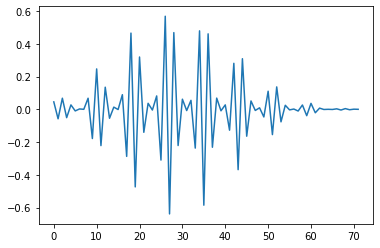

In [10]:
plt.plot(state)

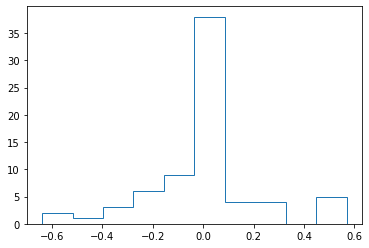

In [11]:
counts, bins = np.histogram(state)
plt.stairs(counts, bins)